## PREDIKSI PELANGGAN YANG GA MAKE BANK LAGI

In [52]:
#import pandas as pd
#import matplotlib.pyplot as plt 
#import seaborn as sn
#import plotly.express as ex

#%pip install imbalanced-learn
#from imblearn.over_sampling import SMOTE

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
#import scikitplot as skplt

plt.rc('figure',figsize=(18,9))
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Note: you may need to restart the kernel to use updated packages.


In [53]:
df = pd.read_csv('BankChurners.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [54]:
df.shape

(10127, 23)

In [55]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [56]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

### VISUALIZATION

### Education Level 

In [57]:
ex.pie(df,names='Education_Level',title='Education Levels')

In [58]:
ex.pie(df,names='Gender',title='Propotion Of Customer Genders')

In [59]:
ex.pie(df,names='Income_Category',title='Propotion Of Different Income Levels')

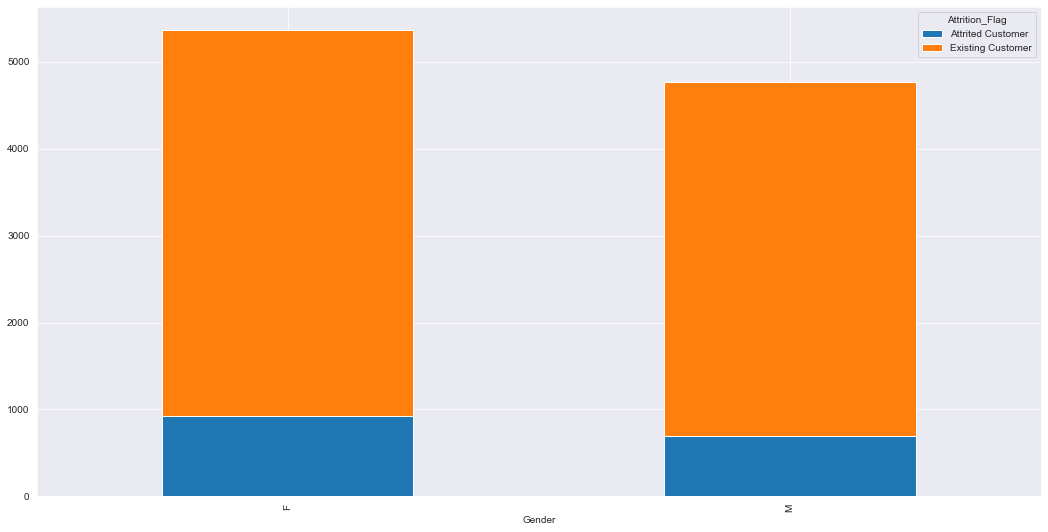

In [60]:
df.groupby(['Gender','Attrition_Flag']).size().unstack().plot(kind='bar',stacked=True)

plt.show()

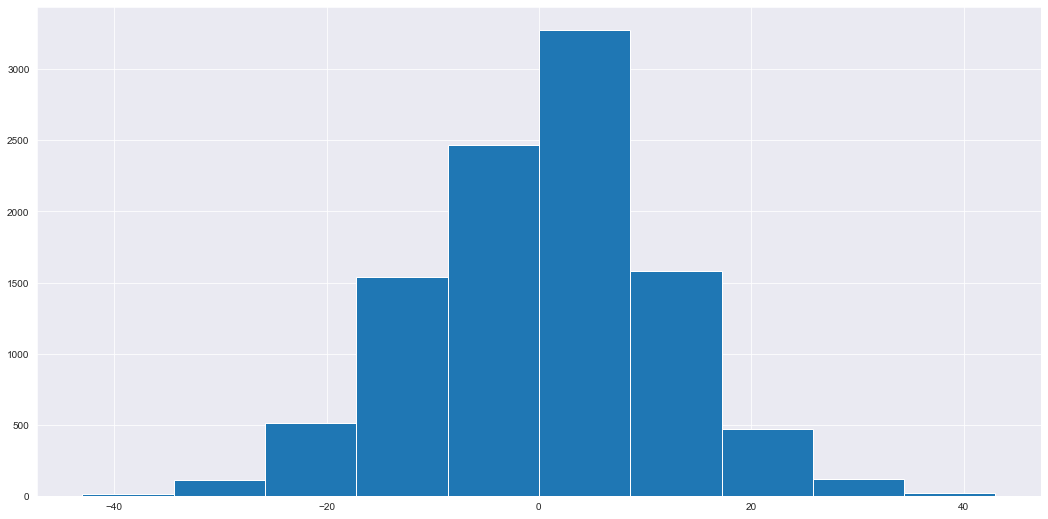

In [61]:
plt.figure();

df['Months_on_book'].diff().hist()

[Text(0, 0.5, 'Customer_Age'),
 Text(0.5, 0, 'Income_Category'),
 Text(0.5, 1.0, 'Box Plot On Income_Category')]

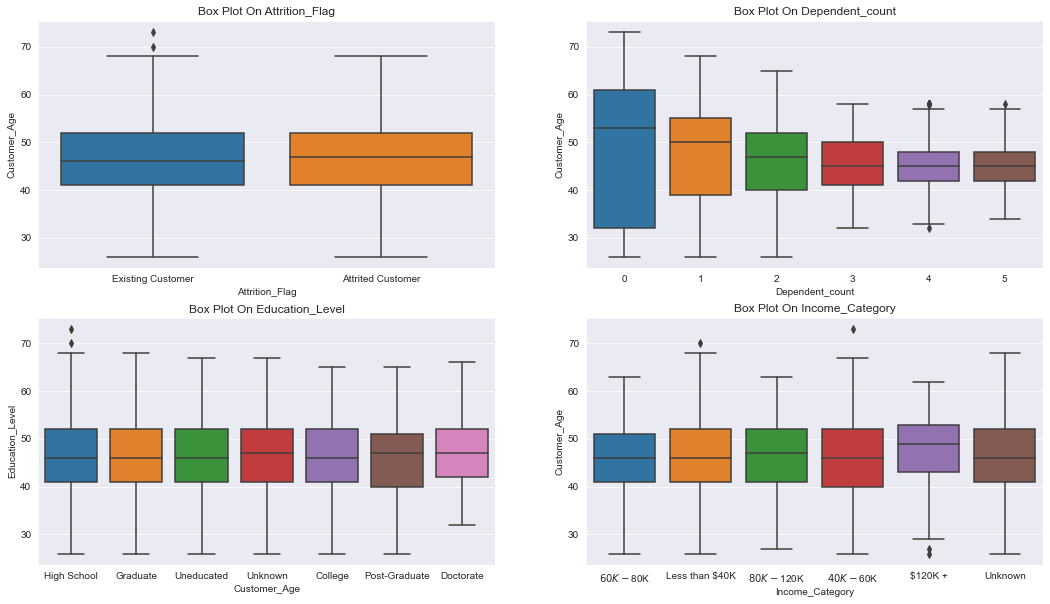

In [62]:
fig, axes = plt.subplots(nrows=2,ncols=2) # (nrows=2,ncols=2) ini karna mau upload gambarnya ada 4 kan jadi 2x2 gituu
fig.set_size_inches(18, 10)
sns.boxplot(data=df,y="Customer_Age",x="Attrition_Flag",orient="v",ax=axes[0][0]) # [0][0] ini tuh koordinat datanya sama buat kaya yg bawah kaya 0,0 atau 0,1
sns.boxplot(data=df,y="Customer_Age",x="Dependent_count",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="Customer_Age",x="Education_Level",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="Customer_Age",x="Income_Category",orient="v",ax=axes[1][1])

axes[0][0].set(xlabel='Attrition_Flag', ylabel='Customer_Age',title="Box Plot On Attrition_Flag")
axes[0][1].set(xlabel='Dependent_count', ylabel='Customer_Age',title="Box Plot On Dependent_count")
axes[1][0].set(xlabel='Customer_Age', ylabel='Education_Level',title="Box Plot On Education_Level")
axes[1][1].set(xlabel='Income_Category', ylabel='Customer_Age',title="Box Plot On Income_Category")

### DATA PREPROCESSING

data processing buat ganti string jadi angka 

In [63]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [64]:
df.Attrition_Flag = df.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
df.Gender = df.Gender.replace({'F':1,'M':0})
df = pd.concat([df,pd.get_dummies(df['Education_Level']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Income_Category']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Card_Category']).drop(columns=['Platinum'])],axis=1)
df.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)

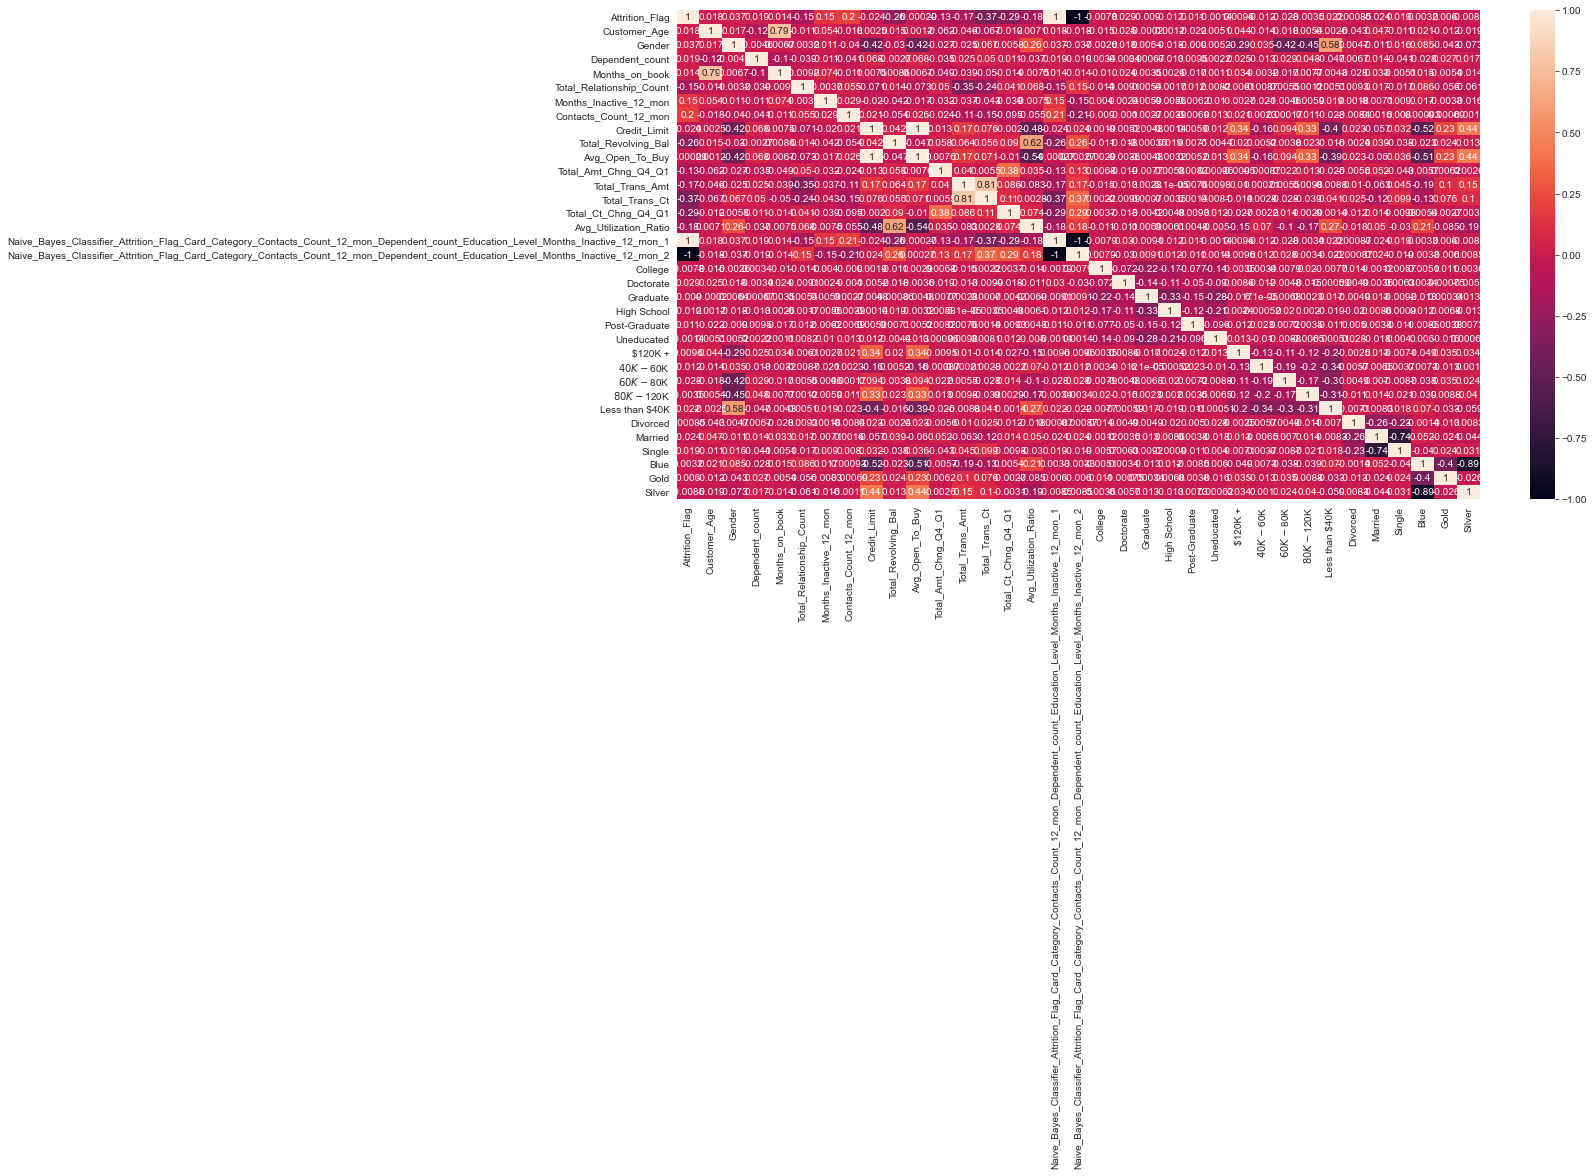

In [65]:
sns.heatmap(df.corr('pearson'),annot=True)

In [66]:
df

Attrition_Flag  Customer_Age  Gender  Dependent_count  Months_on_book  \
0                   0            45       0                3              39   
1                   0            49       1                5              44   
2                   0            51       0                3              36   
3                   0            40       1                4              34   
4                   0            40       0                3              21   
...               ...           ...     ...              ...             ...   
10122               0            50       0                2              40   
10123               1            41       0                2              25   
10124               1            44       1                1              36   
10125               1            30       0                2              36   
10126               1            43       1                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  ...  \
0                          3       12691.0                  777  ...   
1                          2        8256.0                  864  ...   
2                          0        3418.0                    0  ...   
3                          1        3313.0                 2517  ...   
4                          0        4716.0                    0  ...   
...                      ...           ...                  ...  ...   
10122                      3        4003.0                 1851  ...   
10123                      3        4277.0                 2186  ...   
10124                      4        5409.0                    0  ...   
10125                      3        5281.0                    0  ...   
10126                      4       10388.0                 1961  ...   

       $40K - $60K  $60K - $80K  $80K - $120K  Less than $40K  Divorced  \
0                0            1             0               0         0   
1                0            0             0               1         0   
2                0            0             1               0         0   
3                0            0             0               1         0   
4                0            1             0               0         0   
...            ...          ...           ...             ...       ...   
10122            1            0             0               0         0   
10123            1            0             0               0         1   
10124            0            0             0               1         0   
10125            1            0             0               0         0   
10126            0            0             0               1         0   

       Married  Single  Blue  Gold  Silver  
0            1       0     1     0       0  
1            0       1     1     0       0  
2            1       0     1     0       0  
3            0       0     1     0       0  
4            1       0     1     0       0  
...        ...     ...   ...   ...     ...  
10122        0       1     1     0       0  
10123        0       0     1     0       0  
10124        1       0     1     0       0  
10125        0       0     1     0       0  
10126        1       0     0     0       1  

[10127 rows x 35 columns]

### Classification Using SMOTE

In [67]:
oversample = SMOTE()
X, y = oversample.fit_resample(df[df.columns[1:]], df[df.columns[0]])
usampled_df = X.assign(Churn = y)

In [68]:
ohe_data =usampled_df[usampled_df.columns[15:-1]].copy()

usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

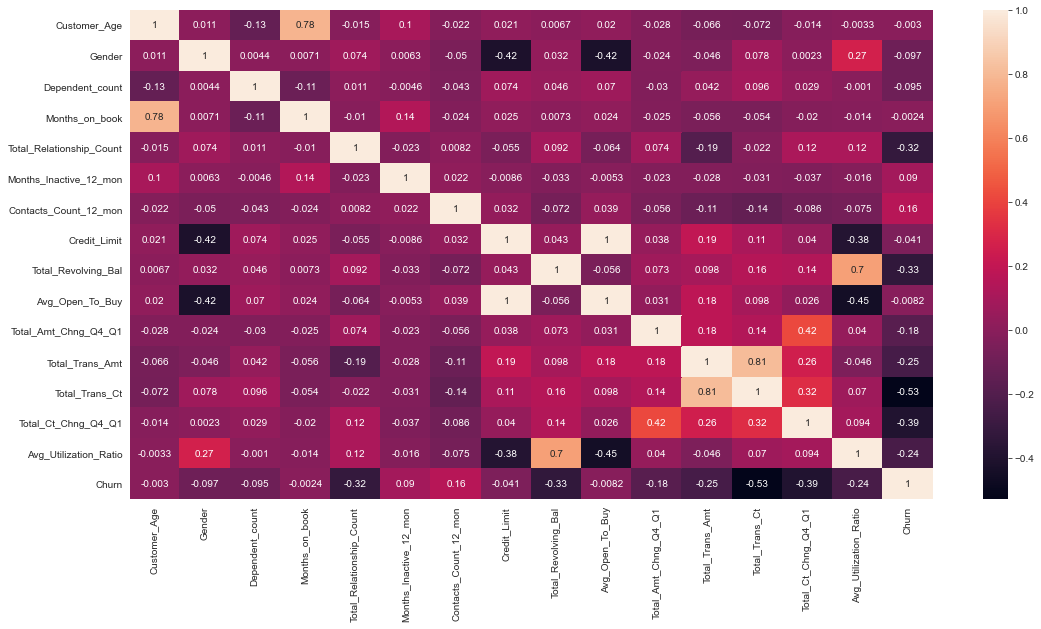

In [69]:
sns.heatmap(usampled_df.corr('pearson'),annot=True)

### PCA

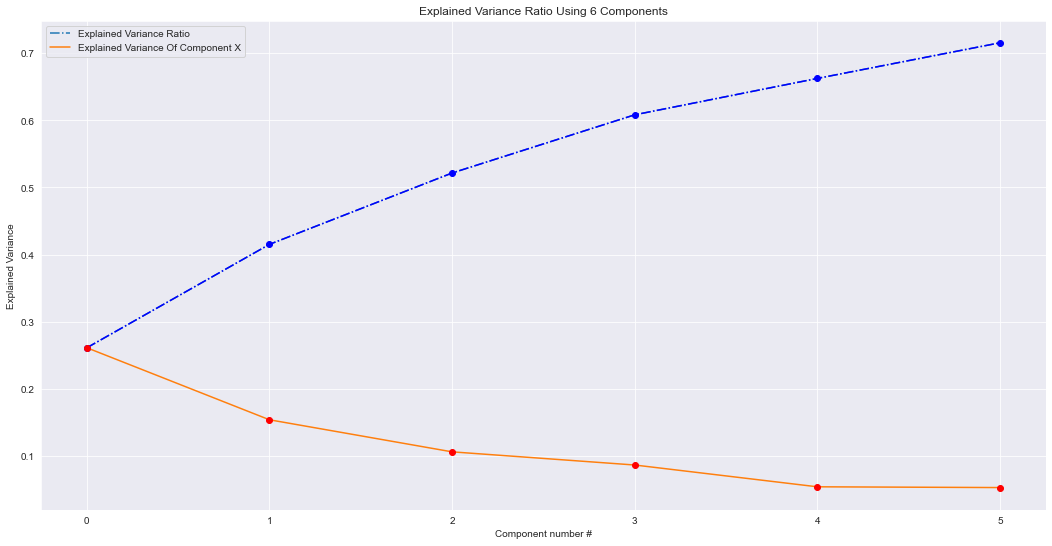

In [70]:
N_COMPONENTS = 6

pca_model = PCA(n_components = N_COMPONENTS )

pc_matrix = pca_model.fit_transform(ohe_data)

evr = pca_model.explained_variance_ratio_
cumsum_evr = np.cumsum(evr)

ax = sns.lineplot(x=np.arange(0,len(cumsum_evr)),y=cumsum_evr,label='Explained Variance Ratio')
ax.lines[0].set_linestyle('-.')
ax.set_title('Explained Variance Ratio Using {} Components'.format(N_COMPONENTS))
ax.plot(np.arange(0,len(cumsum_evr)),cumsum_evr,'bo')
ax = sns.lineplot(x=np.arange(0,len(cumsum_evr)),y=evr,label='Explained Variance Of Component X')
ax.plot(np.arange(0,len(evr)),evr,'ro')
ax.lines[1].set_linestyle('-.')
ax.set_xticks([i for i in range(0,len(cumsum_evr))])
ax.set_xlabel('Component number #')
ax.set_ylabel('Explained Variance')
plt.show()

In [71]:
usampled_df_with_pcs = pd.concat([usampled_df,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)
usampled_df_with_pcs

Customer_Age  Gender  Dependent_count  Months_on_book  \
0                45       0                3              39   
1                49       1                5              44   
2                51       0                3              36   
3                40       1                4              34   
4                40       0                3              21   
...             ...     ...              ...             ...   
16995            59       1                1              49   
16996            39       0                1              31   
16997            49       0                2              43   
16998            47       1                3              42   
16999            48       1                2              31   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
16995                         3                       2   
16996                         1                       2   
16997                         5                       2   
16998                         2                       3   
16999                         5                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3  12691.000000                  777   
1                          2   8256.000000                  864   
2                          0   3418.000000                    0   
3                          1   3313.000000                 2517   
4                          0   4716.000000                    0   
...                      ...           ...                  ...   
16995                      2   1438.300000                    0   
16996                      2   1637.939556                    0   
16997                      4   3495.103773                    0   
16998                      3   1496.981302                    0   
16999                      3   2503.422918                 1426   

       Avg_Open_To_Buy  ...  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0         11914.000000  ...              42             1.625000   
1          7392.000000  ...              33             3.714000   
2          3418.000000  ...              20             2.333000   
3           796.000000  ...              20             2.333000   
4          4716.000000  ...              28             2.500000   
...                ...  ...             ...                  ...   
16995      1438.300000  ...              15             0.580264   
16996      1637.939556  ...              44             0.576323   
16997      3495.103773  ...              41             0.463051   
16998      1496.981302  ...              37             0.482960   
16999      1077.202081  ...              36             0.270294   

       Avg_Utilization_Ratio  Churn      PC-0      PC-1      PC-2      PC-3  \
0                   0.061000      0 -0.811083 -0.631922 -0.455831 -0.543415   
1                   0.105000      0 -0.813647  0.805507  0.772866  0.603121   
2                   0.000000      0 -0.862501 -0.647424 -0.305044  0.742916   
3                   0.760000      0 -0.638708  0.120154  0.596303 -0.670482   
4                   0.000000      0 -0.779650 -0.624809 -0.411838 -0.319948   
...                      ...    ...       ...       ...       ...       ...   
16995               0.000000      1  0.670048 -0.729559 -0.143787 -0.052213   
16996               0.000000      1  0.691392 -0.002130 -0.033897  0.853887   
16997               0.000000      1  0.766581  0.678508 -0.176692 -0.030786   
16998               0.000000      1  0.724223 -0.015327 -0.029728  0.852391   
16999               0.569785      1  0

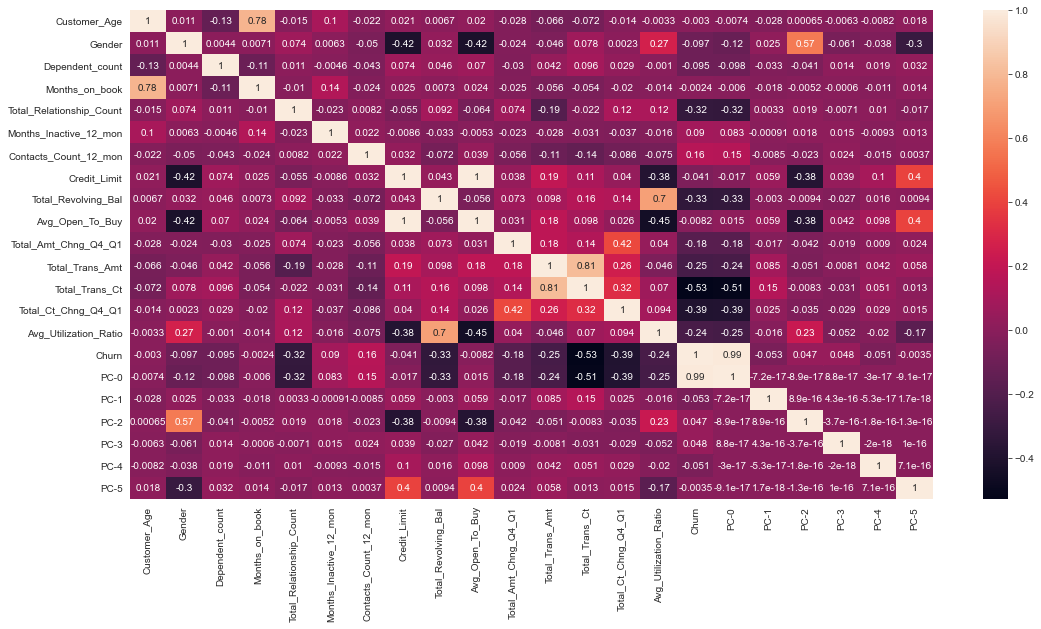

In [72]:
sns.heatmap(usampled_df_with_pcs.corr('pearson'),annot=True)

### MODEL SELECTION AND EVALUATION 

In [73]:
X_features = ['Total_Trans_Ct','PC-3','PC-1','PC-0','PC-2','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count']

X = usampled_df_with_pcs[X_features]
y = usampled_df_with_pcs['Churn']

In [74]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)

### CROSS VALIDATION

In [75]:
rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
ada_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",AdaBoostClassifier(random_state=42,learning_rate=0.7)) ])
svm_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",SVC(random_state=42,kernel='rbf')) ])


f1_cross_val_scores = cross_val_score(rf_pipe,train_x,train_y,cv=5,scoring='f1')
ada_f1_cross_val_scores=cross_val_score(ada_pipe,train_x,train_y,cv=5,scoring='f1')
svm_f1_cross_val_scores=cross_val_score(svm_pipe,train_x,train_y,cv=5,scoring='f1')


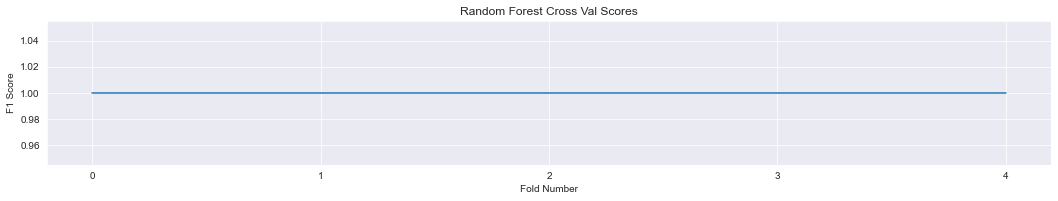

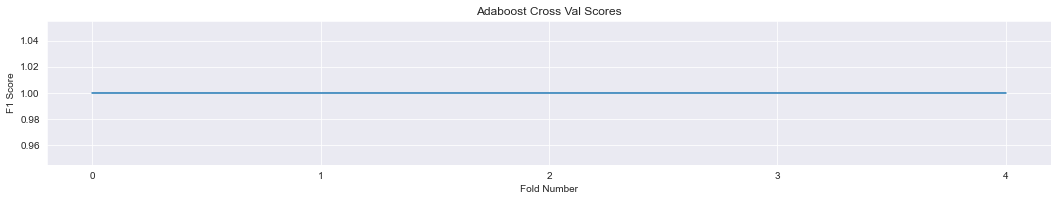

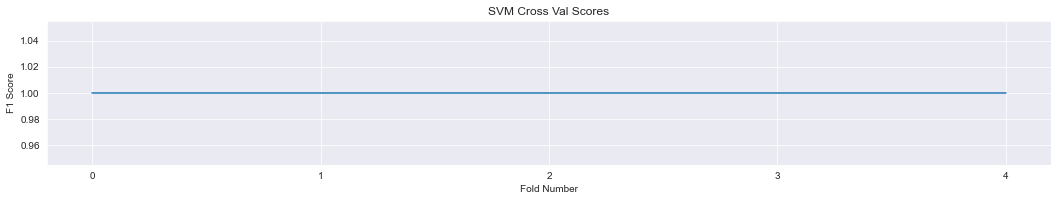

In [76]:
plt.subplot(3,1,1)
ax = sns.lineplot(x=range(0,len(f1_cross_val_scores)),y=f1_cross_val_scores)
ax.set_title('Random Forest Cross Val Scores')
ax.set_xticks([i for i in range(0,len(f1_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('F1 Score')
plt.show()
plt.subplot(3,1,2)
ax = sns.lineplot(x=range(0,len(ada_f1_cross_val_scores)),y=ada_f1_cross_val_scores)
ax.set_title('Adaboost Cross Val Scores')
ax.set_xticks([i for i in range(0,len(ada_f1_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('F1 Score')
plt.show()
plt.subplot(3,1,3)
ax = sns.lineplot(x=range(0,len(svm_f1_cross_val_scores)),y=svm_f1_cross_val_scores)
ax.set_title('SVM Cross Val Scores')
ax.set_xticks([i for i in range(0,len(svm_f1_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('F1 Score')
plt.show()

### MODEL EVALUATION

In [77]:
rf_pipe.fit(train_x,train_y)
rf_prediction = rf_pipe.predict(test_x)

ada_pipe.fit(train_x,train_y)
ada_prediction = ada_pipe.predict(test_x)

svm_pipe.fit(train_x,train_y)
svm_prediction = svm_pipe.predict(test_x)

print('F1 Score of Random Forest Model On Test Set - {}'.format(f1(rf_prediction,test_y)))
print('F1 Score of AdaBoost Model On Test Set - {}'.format(f1(ada_prediction,test_y)))
print('F1 Score of SVM Model On Test Set - {}'.format(f1(svm_prediction,test_y)))

F1 Score of Random Forest Model On Test Set - 1.0
F1 Score of AdaBoost Model On Test Set - 1.0
F1 Score of SVM Model On Test Set - 1.0


### Model Evaluation On Original Data (Before Upsampling)

In [78]:
ohe_data =df[df.columns[16:]].copy()
pc_matrix = pca_model.fit_transform(ohe_data)
original_df_with_pcs = pd.concat([df,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)

unsampled_data_prediction_RF = rf_pipe.predict(original_df_with_pcs[X_features])
unsampled_data_prediction_ADA = ada_pipe.predict(original_df_with_pcs[X_features])
unsampled_data_prediction_SVM = svm_pipe.predict(original_df_with_pcs[X_features])

In [79]:
print('F1 Score of Random Forest Model On Original Data (Before Upsampling) - {}'.format(f1(unsampled_data_prediction_RF,original_df_with_pcs['Attrition_Flag'])))
print('F1 Score of AdaBoost Model On Original Data (Before Upsampling) - {}'.format(f1(unsampled_data_prediction_ADA,original_df_with_pcs['Attrition_Flag'])))
print('F1 Score of SVM Model On Original Data (Before Upsampling) - {}'.format(f1(unsampled_data_prediction_SVM,original_df_with_pcs['Attrition_Flag'])))

F1 Score of Random Forest Model On Original Data (Before Upsampling) - 0.2597990660817886
F1 Score of AdaBoost Model On Original Data (Before Upsampling) - 0.2597990660817886
F1 Score of SVM Model On Original Data (Before Upsampling) - 0.26568158771548606


### RESULT

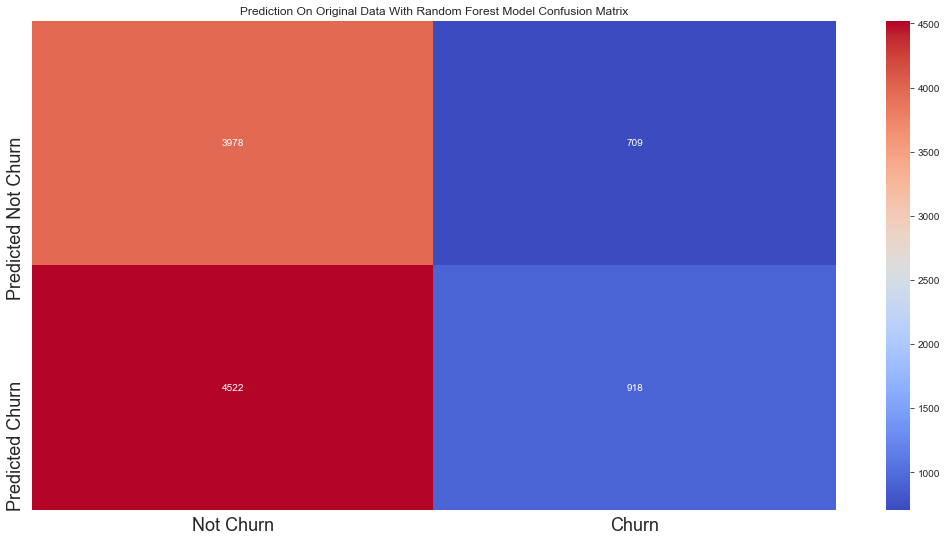

In [80]:
ax = sns.heatmap(confusion_matrix(unsampled_data_prediction_RF,original_df_with_pcs['Attrition_Flag']),annot=True,cmap='coolwarm',fmt='d')
ax.set_title('Prediction On Original Data With Random Forest Model Confusion Matrix')
ax.set_xticklabels(['Not Churn','Churn'],fontsize=18)
ax.set_yticklabels(['Predicted Not Churn','Predicted Churn'],fontsize=18)

plt.show()

## Oversample with naive sampling to match numbers in each class

In [81]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [82]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 8500), (1, 8500)]


In [83]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 8500), (1, 8500)]


## Random Under Sampling

In [84]:
from sklearn import datasets
import numpy as np
from collections import Counter
X, y = datasets.make_classification(
            n_samples     = 2000,  # number of data points
            n_classes     = 2,      # number of classes
            n_clusters_per_class=2, # The number of clusters per class 
            weights       = [0.03,0.97], # The proportions assigned to each class
            n_features    = 10,     # number of total features 
            n_informative = 2,      # number of informative features 
            n_redundant   = 2,      # number of redundant features
            random_state  = 0                       )
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({1: 1927, 0: 73})


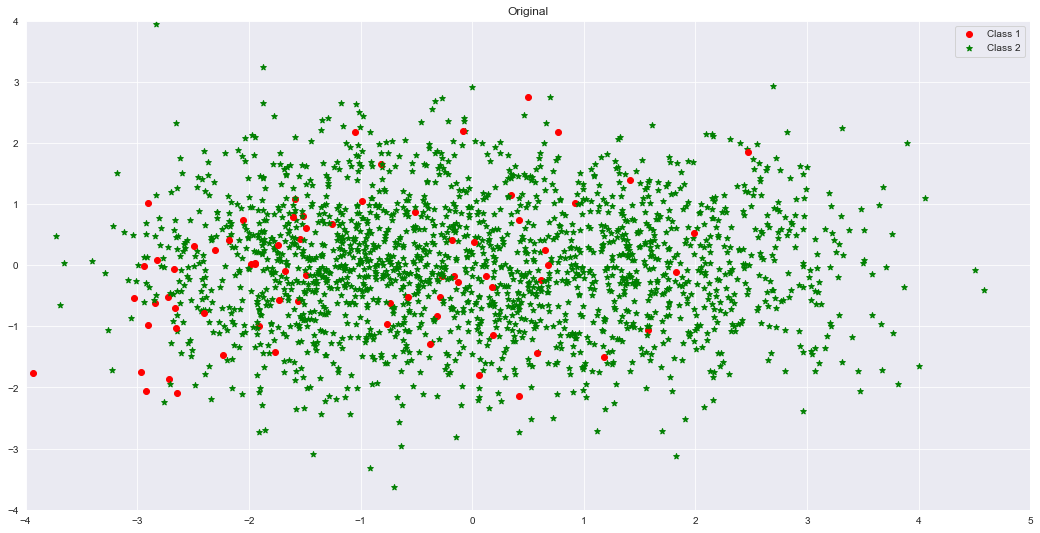

In [85]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    
plot_this(X,y,'Original')

In [86]:
from imblearn.datasets import make_imbalance
X_rs, y_rs = make_imbalance(X, y, ratio={1: 1000, 0: 65},
                      random_state=0)
print('Random undersampling {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'Random undersampling')

ValueError: 'sampling_strategy' has to be a dictionary or a function returning a dictionary. Got <class 'NoneType'> instead.

## COBAAAA

In [ ]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# defining the dataset
X, y = make_classification(n_samples= 10000, weights=[.99])
# class distribution
print(Counter(y))

In [87]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('BankChurners.csv')

target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

AttributeError: 'DataFrame' object has no attribute 'target'